In [25]:
#Imports
from BHDVCS_tf import DvcsData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")

#Returns lists that contain the kinematics for each index
def getkinematics(numSets):
    k = []
    QQ = []
    xb = []
    t = []
    for i in range(numSets):
        #gets a set's kinematics
        kvar, Q, x, ts = df.loc[45 * i, 'k': 't']
        
        #adds set's kinematics to running list
        k.append(kvar)
        QQ.append(Q)
        xb.append(x)
        t.append(ts)
    
    return k, QQ, xb, t

#Returns list with percent error values that correspond to Red-->Green Colormap
def getColorMappingValues(errF, amountofSets):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
        
        # NOTE we take max(mean, -1) because if data is more than 100% error it should just cap in terms of heatmapping
        #Inverted because currently smaller values are red and larger values are green
        #Want to make opposite (smaller %error-values = green and larger %error-values = red) therefore we multiply by -1
        ReHMean.append(100 * max(-abs(np.mean(data.ReH)), -1))
        ReEMean.append(100 * max(-abs(np.mean(data.ReE)), -1))
        ReHtildeMean.append(100 * max(-abs(np.mean(data.ReHtilde)), -1))

    return ReHMean, ReEMean, ReHtildeMean    

#Code to output the three plots all in one line
def threePlots(errF, numSets):
        plt.style.use('bmh')
        #Currently done so that only xb and t are used for kinematics
        h, e, tilde = getColorMappingValues(errF, numSets)
        _, _, xb, t = getkinematics(numSets)

        #Creating one figure with three different plots
        fig, axes = plt.subplots(1, 3)
        fig.suptitle('Percent Error on Predictions for CFFs with ' + str(100 * errF) + "% Error on F")
        
        #Putting the three plots on each axes
        axes[0].set_title('ReH')
        axes[0].scatter(xb, t, c=h, cmap='RdYlGn')
        axes[0].set(ylabel='t')
        
        axes[1].scatter(xb, t, c=e, cmap='RdYlGn')
        axes[1].set_title('ReE')

        axes[2].scatter(xb, t, c=tilde, cmap='RdYlGn')
        axes[2].set_title('ReHtilde')

        #Manually setting size so figure is not scrunched
        fig.set_size_inches(18.5, 4.5, forward=True)
        
        #Labelling all x axis of plots
        for ax in axes:
            ax.set(xlabel='x_b')

# Plots for Percent Error on F vs Percent Error in CFF predictions

0% Error for Percent Error Accuracy

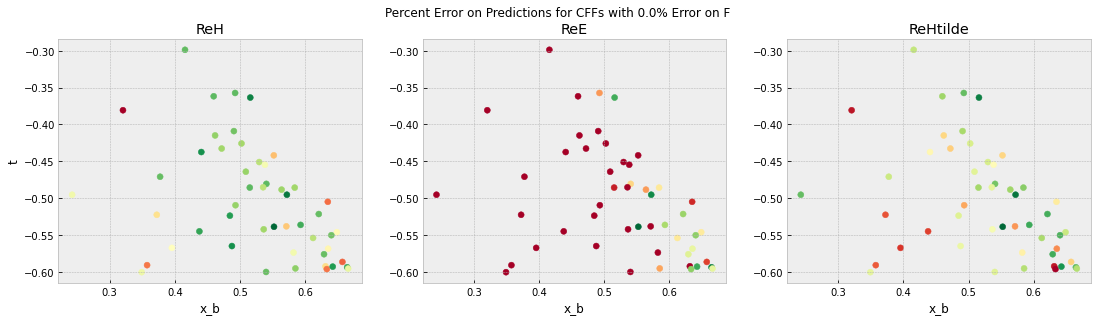

In [4]:
threePlots(0.0, 50)

5% Error For Percent Error Accuracy

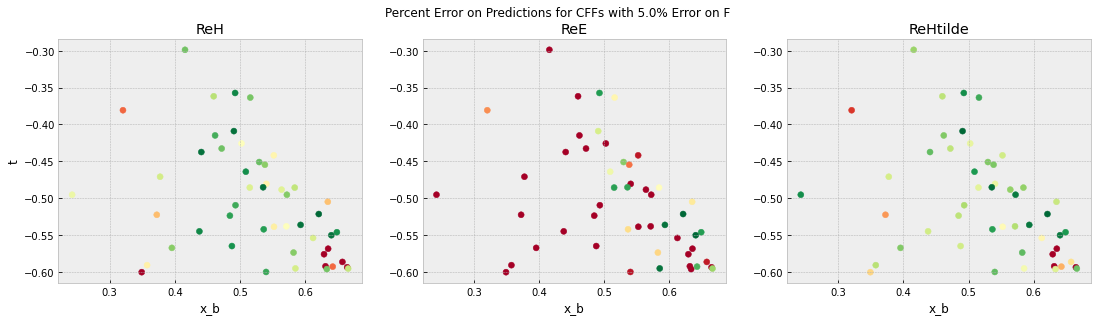

In [5]:
threePlots(0.05, 50)

30% Error for Percent Error Accuracy

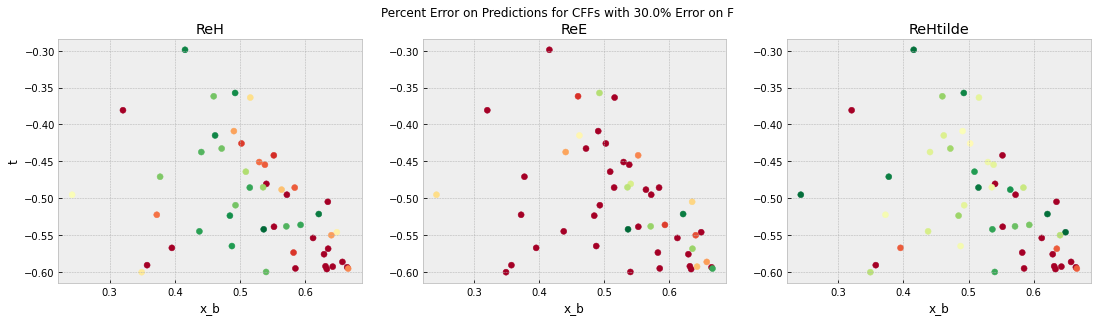

In [6]:
threePlots(0.3, 50)

# 3d Plot (Non interactive)

Text(0.5, 0.92, 'ReH Percent Error against Kinematics at 0.0% Error on F')

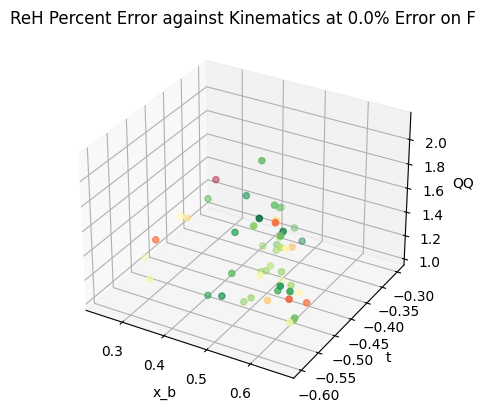

In [7]:
h, e, tilde = getColorMappingValues(0.0, 50)
_, QQ, xb, t = getkinematics(50)

plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xb, t, QQ, c=h, cmap='RdYlGn')


ax.set_xlabel('x_b')
ax.set_ylabel('t')
ax.set_zlabel('QQ')
ax.set_title('ReH Percent Error against Kinematics at ' + str(0.0 * 100) + '% Error on F')

Text(0.5, 0.92, 'ReH Percent Error against Kinematics at 5.0% Error on F')

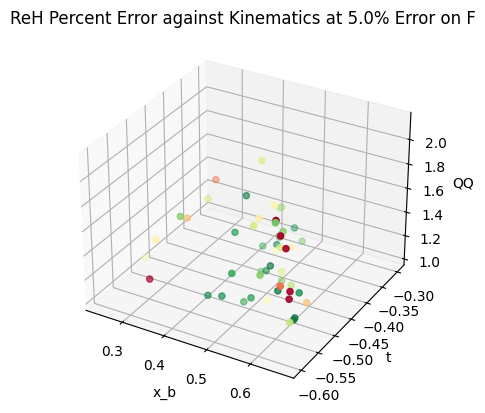

In [8]:
h, e, tilde = getColorMappingValues(0.05, 50)
_, QQ, xb, t = getkinematics(50)

plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xb, t, QQ, c=h, cmap='RdYlGn')


ax.set_xlabel('x_b')
ax.set_ylabel('t')
ax.set_zlabel('QQ')
ax.set_title('ReH Percent Error against Kinematics at ' + str(0.05 * 100) + '% Error on F')

Text(0.5, 0.92, 'ReH Percent Error against Kinematics at 30.0% Error on F')

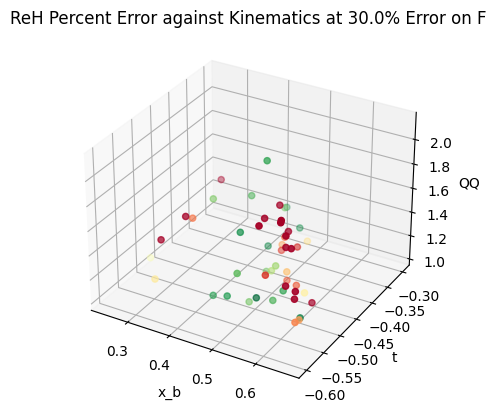

In [9]:
h, e, tilde = getColorMappingValues(0.3, 50)
_, QQ, xb, t = getkinematics(50)

plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xb, t, QQ, c=h, cmap='RdYlGn')


ax.set_xlabel('x_b')
ax.set_ylabel('t')
ax.set_zlabel('QQ')
ax.set_title('ReH Percent Error against Kinematics at ' + str(0.3 * 100) + '% Error on F')

# Interactive Plotly Plots

In [38]:
import plotly.graph_objects as go
import plotly.express as px

def plotInteractive(err, numSets, whichCFF):
    h, e, tilde = getColorMappingValues(err, numSets)
    _, QQ, xb, t = getkinematics(numSets)

    chosen = []
    if whichCFF == 'ReH':
        chosen = h
    elif whichCFF == 'ReE':
        chosen = e
    else: 
        chosen = tilde
        whichCFF = 'ReHtilde'

    size = [6] * numSets

    # Blue means better predictions -- Red --> Worse Predictions
    # splot = go.Figure(data=[go.Scatter3d(
    #     x=QQ,
    #     y=t,
    #     z=xb,
    #     mode='markers',
    #     marker=dict(
    #         size=6,
    #         color=chosen,                # set color to an array/list of desired values
    #         colorscale='RdBu',   # choose a colorscale
    #         opacity=0.8
    #     )
    # )])

    splot = px.scatter_3d(x=QQ, y=t, z=xb,
                    color=chosen, color_continuous_scale = "RdYlGn", size=size)


    splot.update_layout(
        title = 'Prediction Accuracy on ' + whichCFF + ' with ' + str(err*100) + '% Error on F',
        scene = dict(
            xaxis_title='QQ',
            yaxis_title='x_b',
            zaxis_title='t',
            aspectmode='cube',
        ),
        template='ggplot2',
        margin=dict(r=0, b=40, l=0, t=50)
    )

    splot.write_html('Interactive Plots/Pred%Acc_' + whichCFF + '_' +str(err*100) + 'ErrF.html')

    #splot.show()

In [35]:
plotInteractive(0.0, 50, 'ReH')

In [36]:
plotInteractive(0.05, 50, 'ReH')

In [37]:
plotInteractive(0.3, 50, 'ReH')

In [39]:
errors = [0.0, 0.01, 0.025, 0.05, 0.1, 0.15, 0.25, 0.30]
for err in errors: 
    plotInteractive(err, 50, 'ReH')
    plotInteractive(err, 50, 'ReE')
    plotInteractive(err, 50, 'ReHtilde')